In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso, LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [101]:
df = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1/main/Datasets/churn_data.csv')

In [102]:
df.head()

,Unnamed: 0,CustomerID,Age,Location,Device,Month_1_Spend,Month_1_Items,Month_1_Support_Calls,Month_2_Spend,Month_2_Items,...,Month_10_Spend,Month_10_Items,Month_10_Support_Calls,Month_11_Spend,Month_11_Items,Month_11_Support_Calls,Month_12_Spend,Month_12_Items,Month_12_Support_Calls,Churn
0,0,1,46,US,iOS,756.005761,39,2,582.023075,92,...,280.397827,60,0,700.181510,66,3,382.719682,59,0,1
1,1,2,52,US,iOS,594.838157,59,0,251.269898,33,...,863.000645,89,1,571.331352,28,3,570.203975,89,0,1
2,2,3,43,Canada,Android,453.217405,21,3,124.178946,92,...,858.545990,60,5,198.222684,38,1,187.475764,79,5,1
3,3,4,41,US,iOS,621.453170,95,1,134.362559,46,...,404.590146,59,3,565.395592,78,1,281.415092,63,4,1
4,4,5,41,US,iOS,660.735119,48,5,713.265527,54,...,178.143438,85,1,574.382094,34,2,544.981985,28,2,1


In [103]:
df.columns

Index(['Unnamed: 0', 'CustomerID', 'Age', 'Location', 'Device',
       'Month_1_Spend', 'Month_1_Items', 'Month_1_Support_Calls',
       'Month_2_Spend', 'Month_2_Items', 'Month_2_Support_Calls',
       'Month_3_Spend', 'Month_3_Items', 'Month_3_Support_Calls',
       'Month_4_Spend', 'Month_4_Items', 'Month_4_Support_Calls',
       'Month_5_Spend', 'Month_5_Items', 'Month_5_Support_Calls',
       'Month_6_Spend', 'Month_6_Items', 'Month_6_Support_Calls',
       'Month_7_Spend', 'Month_7_Items', 'Month_7_Support_Calls',
       'Month_8_Spend', 'Month_8_Items', 'Month_8_Support_Calls',
       'Month_9_Spend', 'Month_9_Items', 'Month_9_Support_Calls',
       'Month_10_Spend', 'Month_10_Items', 'Month_10_Support_Calls',
       'Month_11_Spend', 'Month_11_Items', 'Month_11_Support_Calls',
       'Month_12_Spend', 'Month_12_Items', 'Month_12_Support_Calls', 'Churn'],
      dtype='object')

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              10000 non-null  int64  
 1   CustomerID              10000 non-null  int64  
 2   Age                     10000 non-null  int64  
 3   Location                10000 non-null  object 
 4   Device                  10000 non-null  object 
 5   Month_1_Spend           10000 non-null  float64
 6   Month_1_Items           10000 non-null  int64  
 7   Month_1_Support_Calls   10000 non-null  int64  
 8   Month_2_Spend           10000 non-null  float64
 9   Month_2_Items           10000 non-null  int64  
 10  Month_2_Support_Calls   10000 non-null  int64  
 11  Month_3_Spend           10000 non-null  float64
 12  Month_3_Items           10000 non-null  int64  
 13  Month_3_Support_Calls   10000 non-null  int64  
 14  Month_4_Spend           10000 non-null 

In [105]:
missing_values = (df.isnull()+df.isna()).sum()
duplicates = df.duplicated().sum()
dtypes = df.dtypes
unique = df.nunique()

insights = pd.DataFrame({
    'missing_values' : missing_values,
    'duplicates': duplicates,
    'data_types': dtypes,
    'unique_values': unique
})
insights

,missing_values,duplicates,data_types,unique_values
Unnamed: 0,0,0,int64,10000
CustomerID,0,0,int64,10000
Age,0,0,int64,46
Location,0,0,object,4
Device,0,0,object,2
Month_1_Spend,0,0,float64,10000
Month_1_Items,0,0,int64,104
Month_1_Support_Calls,0,0,int64,6
Month_2_Spend,0,0,float64,10000
Month_2_Items,0,0,int64,102


- This is a Clean Dataset - No missing values or duplicates

We will create the corresponding variables that are specific to each month which will generate three variables for having the average of these values

- avg_spend = Average of all monthly spends
- avg_items = Average of the number of items for each month
- avg_calls = Average of support calls for all months

- then we will drop all the monthly columns. This is being done to reduce the complexity of the dataset since taking the average of these numerical variables wont cause any loss of information

In [106]:
df['avg_spend'] =  (df['Month_1_Spend'] + df['Month_2_Spend'] + df['Month_3_Spend'] + df['Month_4_Spend'] +df['Month_5_Spend']+ df['Month_6_Spend'] + df['Month_7_Spend'] + df['Month_8_Spend'] + df['Month_9_Spend'] + df['Month_10_Spend']+ df['Month_11_Spend']+ df['Month_12_Spend'])/12
df['avg_items'] = (df['Month_1_Items'] + df['Month_2_Items'] + df['Month_3_Items'] + df['Month_4_Items'] +df['Month_5_Items']+ df['Month_6_Items'] + df['Month_7_Items'] + df['Month_8_Items'] + df['Month_9_Items'] + df['Month_10_Items']+ df['Month_11_Items']+ df['Month_12_Items'])/12
df['avg_calls'] = (df['Month_1_Support_Calls'] + df['Month_2_Support_Calls'] + df['Month_3_Support_Calls'] + df['Month_4_Support_Calls'] +df['Month_5_Support_Calls']+ df['Month_6_Support_Calls'] + df['Month_7_Support_Calls'] + df['Month_8_Support_Calls'] + df['Month_9_Support_Calls'] + df['Month_10_Support_Calls']+ df['Month_11_Support_Calls']+ df['Month_12_Support_Calls'])/12

In [107]:
# drop redundant columns
df.drop(['Unnamed: 0','CustomerID','Month_1_Spend', 'Month_1_Items', 'Month_1_Support_Calls',
       'Month_2_Spend', 'Month_2_Items', 'Month_2_Support_Calls',
       'Month_3_Spend', 'Month_3_Items', 'Month_3_Support_Calls',
       'Month_4_Spend', 'Month_4_Items', 'Month_4_Support_Calls',
       'Month_5_Spend', 'Month_5_Items', 'Month_5_Support_Calls',
       'Month_6_Spend', 'Month_6_Items', 'Month_6_Support_Calls',
       'Month_7_Spend', 'Month_7_Items', 'Month_7_Support_Calls',
       'Month_8_Spend', 'Month_8_Items', 'Month_8_Support_Calls',
       'Month_9_Spend', 'Month_9_Items', 'Month_9_Support_Calls',
       'Month_10_Spend', 'Month_10_Items', 'Month_10_Support_Calls',
       'Month_11_Spend', 'Month_11_Items', 'Month_11_Support_Calls',
       'Month_12_Spend', 'Month_12_Items', 'Month_12_Support_Calls'], axis=1, inplace=True)

In [108]:
df.head()

,Age,Location,Device,Churn,avg_spend,avg_items,avg_calls
0,46,US,iOS,1,568.983464,63.166667,1.916667
1,52,US,iOS,1,446.081453,58.666667,1.833333
2,43,Canada,Android,1,422.393677,63.083333,2.666667
3,41,US,iOS,1,436.612547,71.250000,2.166667
4,41,US,iOS,1,460.925228,56.083333,1.666667


In [109]:
#re-orderfing columns
desired_columns = [col for col in df.columns if col != 'Churn'] + ['Churn']
# Reorder the DataFrame columns
df = df[desired_columns]
df.head()

,Age,Location,Device,avg_spend,avg_items,avg_calls,Churn
0,46,US,iOS,568.983464,63.166667,1.916667,1
1,52,US,iOS,446.081453,58.666667,1.833333,1
2,43,Canada,Android,422.393677,63.083333,2.666667,1
3,41,US,iOS,436.612547,71.250000,2.166667,1
4,41,US,iOS,460.925228,56.083333,1.666667,1


C:\Users\sroff\AppData\Local\Temp\ipykernel_41052\4076226750.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
C:\Users\sroff\AppData\Local\Temp\ipykernel_41052\4076226750.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
C:\Users\sroff\AppData\Local\Temp\ipykernel_41052\4076226750.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
C:\Users\sroff\AppData\Local\Temp\ipykernel_41052\4076226750.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


C:\Users\sroff\AppData\Local\Temp\ipykernel_41052\4076226750.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
C:\Users\sroff\AppData\Local\Temp\ipykernel_41052\4076226750.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


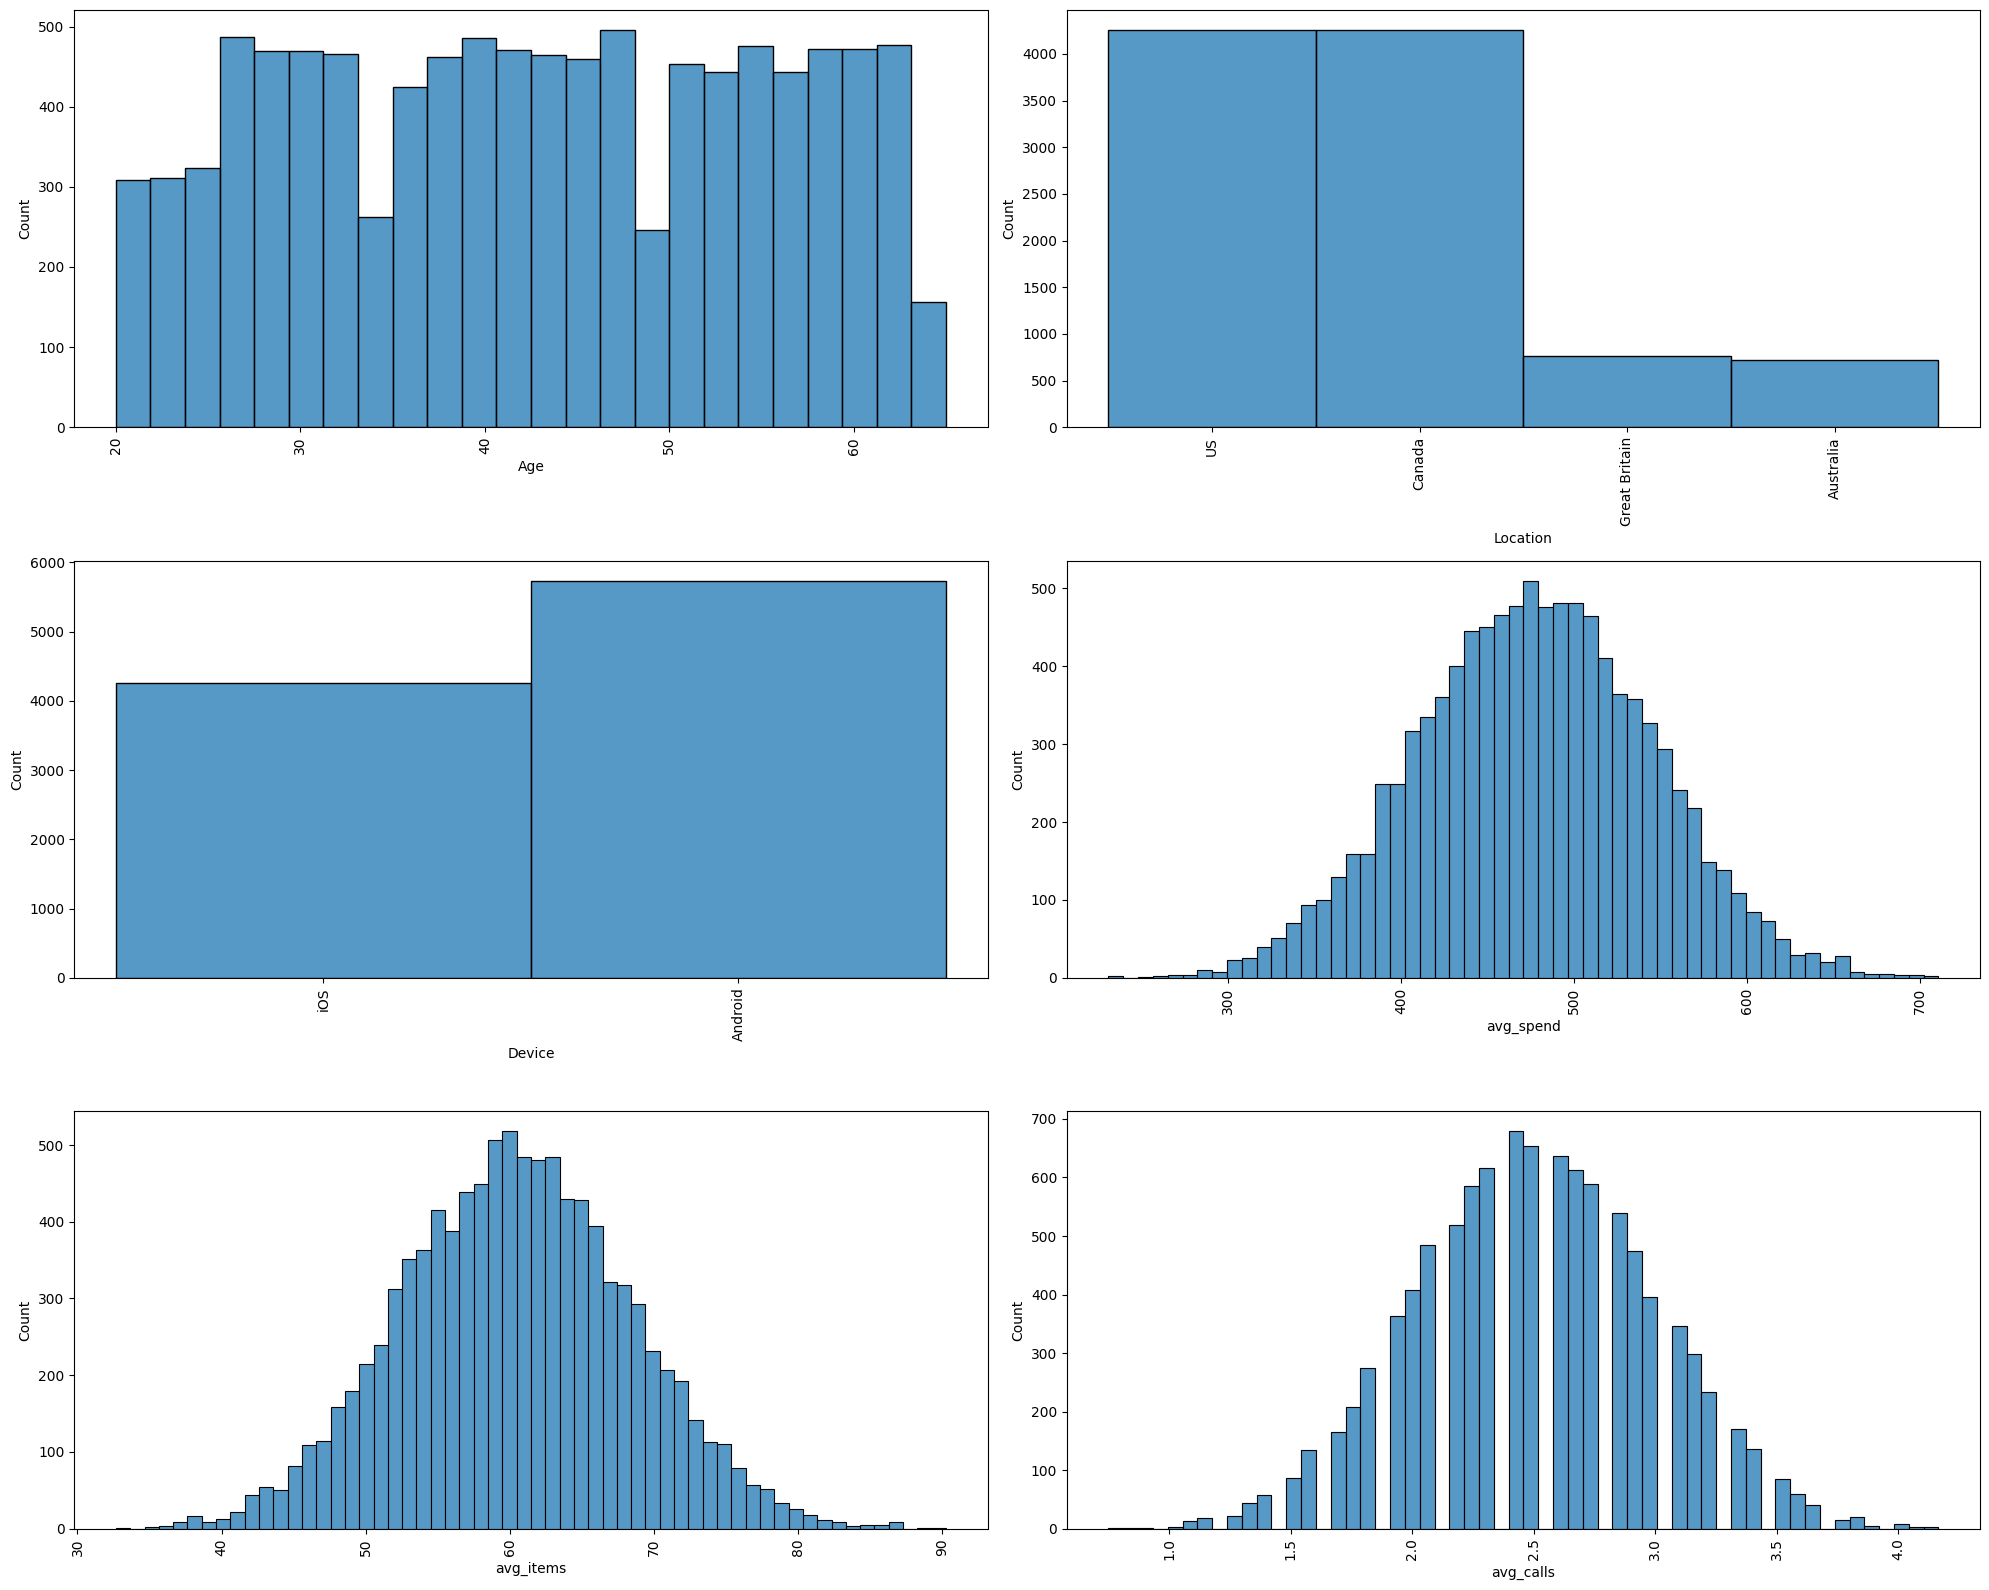

In [110]:
data = df.iloc[:, :-1] # exclude the last column because it is the target

num_cols = data.shape[1]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 16))

axes = axes.flatten()

# Iterating over each column
for i, col in enumerate(data.columns):
    ax = axes[i]
    sns.histplot(x=data[col], ax=ax)
    ax.set_xlabel(col)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    


# Adjusting the spacing between subplots
plt.tight_layout()

# Displaying the plot
plt.show()

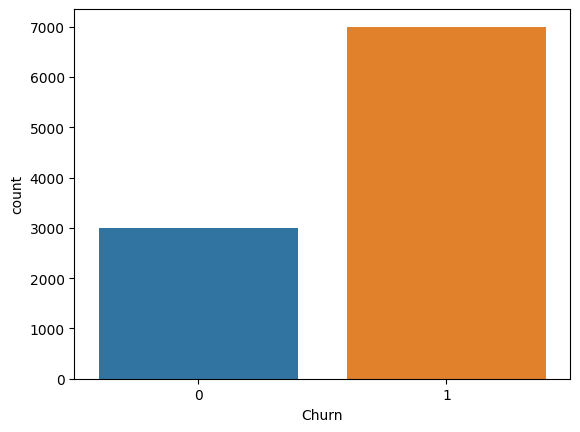

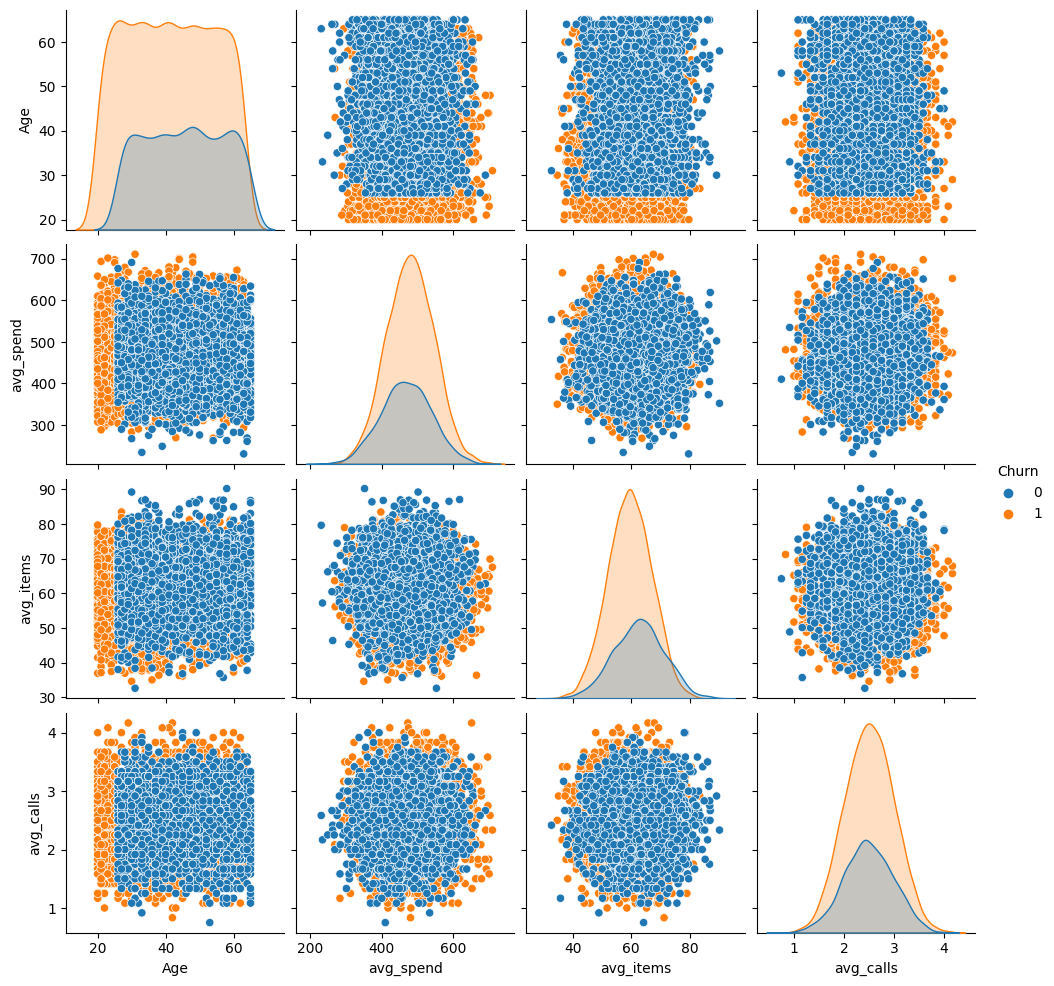

In [111]:
# Display the distribution of 'Died
sns.countplot(x='Churn', data=df)
plt.show()

# More detailed exploration
sns.pairplot(df, hue='Churn')
plt.show()

The count-plot shows us that the dataset is biased. the paiplots convey the same along with the fact that data is not easily separable. This tells us now that using SVM for this dataset won't be an optimum solution

In [112]:
numerical_columns = df.select_dtypes(include=[np.number])  # select all numerical columns
corr_matrix = numerical_columns.corr()

corr_matrix["Churn"].sort_values(ascending=False)

Churn        1.000000
avg_spend    0.079869
avg_calls    0.014339
Age         -0.150151
avg_items   -0.175888
Name: Churn, dtype: float64

<Axes: >

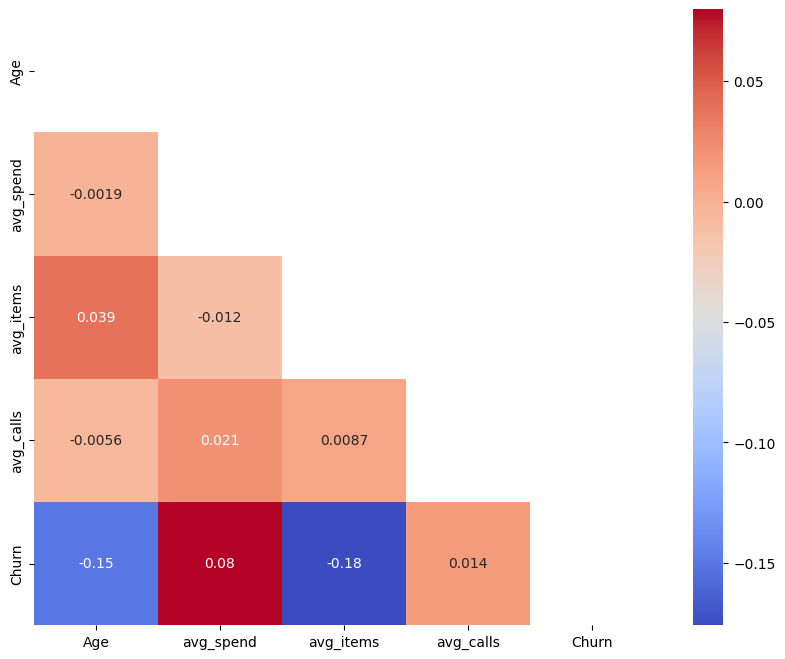

In [113]:
plt.figure(figsize=(10,8))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask,annot=True, cmap='coolwarm')

In [114]:
df.columns

Index(['Age', 'Location', 'Device', 'avg_spend', 'avg_items', 'avg_calls',
       'Churn'],
      dtype='object')

Based on this, we cannot discard any numberical variables to not be correlated to the target variable. So we, will analyse them all.
We also have only to categorical variable, so we will analyse them as well.

### INITIAL HYPOTHESIS - ALL VARIABLES ARE IMPORTANT

#### Numerical Variable Analysis

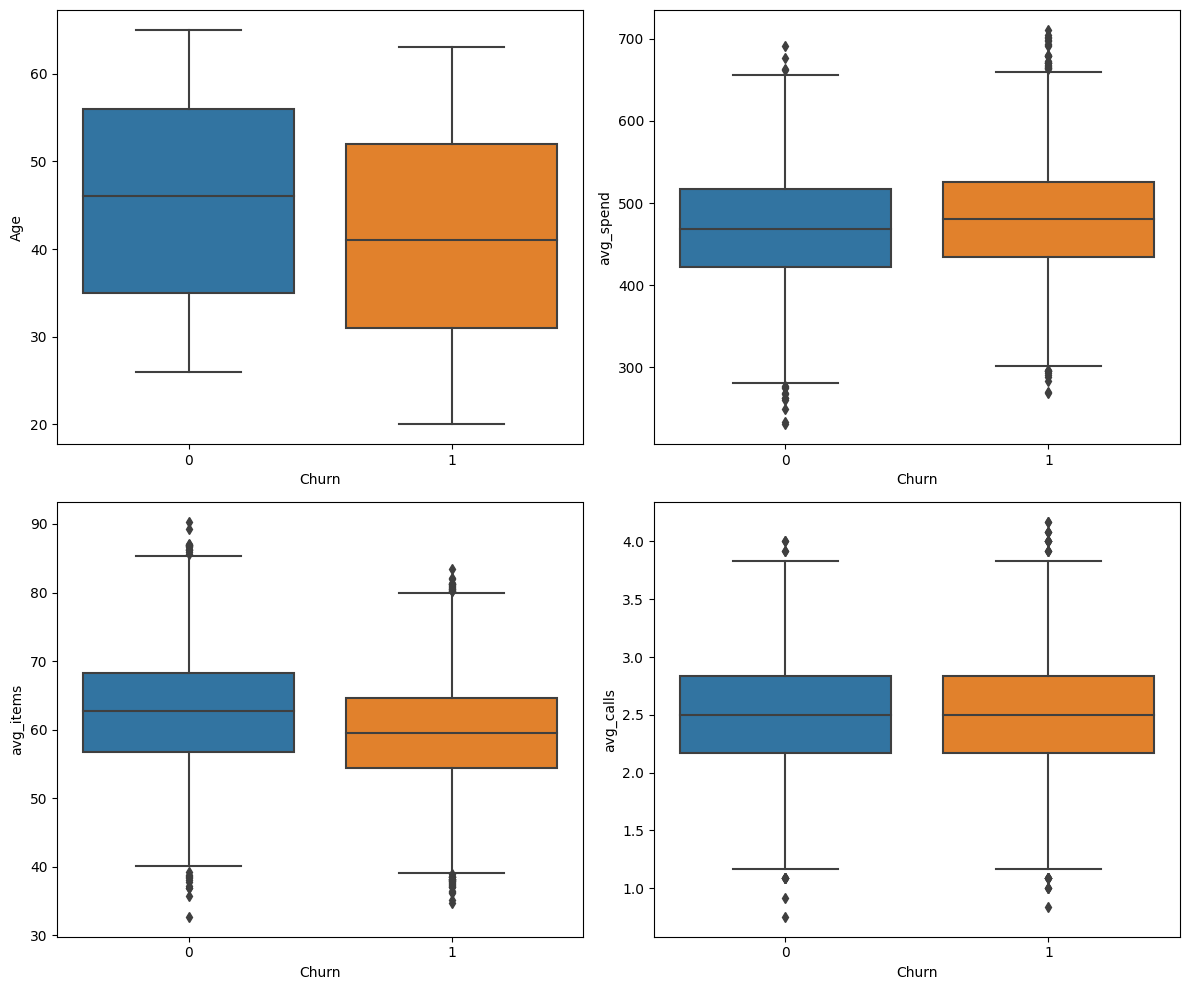

In [115]:
selected_features = [ 'Age', 'avg_spend', 'avg_items', 'avg_calls']


fig, axs = plt.subplots(2, 2, figsize=(12, 10))

for i, feature in enumerate(selected_features):
    row = i // 2
    col = i % 2
    sns.boxplot(x='Churn', y=feature, data=df, ax=axs[row, col])

plt.tight_layout()
plt.show()

Insights from above analysis-
- Age: The median value of age is less for customers that are churning meaning that younger people tend to churn more.
- average_spend : The median value of Average spend is slightly greater for people who are churning
- avg_items : The median value of Average items purchased is slightly less for people who are churning.
- avg_call : No difference in average number of support calls for both groups.

Hence, we discard the variable avg_calls and proceed with the other three

#### Categorical Variable
- We have only 2 categorical VAriables. We take both of them into consideration as important

#### Refined Hupothesis - 'Age', 'Location', 'Device', 'avg_spend', 'avg_items' are important variables

Overall, the distribution of Churned and Not-Churned is biased. This could influence the performance of trained models. We cannot solely rely on accuracy score, and we need to value metrics like f1, and roc curve. To improve the accuracy and precision on this dataset, **cross-validation** will be used to calculate a more representative accuracy score. Also, we will use an **ROC curve** to monitor the prediction results when evaluating the model's performance with a rare positive class.

As mentioned Earlier, we will not be using SVM due to the inseprabilty of the data

In [117]:
cat_columns = ['Location', 'Device']
num_columns = ['Age','avg_spend', 'avg_items']
target = 'Churn'

In [118]:
cat_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
num_transformer = StandardScaler()
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, cat_columns),
                                                 ('num', num_transformer, num_columns)])

In [119]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(df[cat_columns + num_columns], df[target], test_size=0.2, random_state=42)

In [122]:
preprocessor.fit(df[cat_columns + num_columns])
x_train_transformed = preprocessor.transform(X_train)
x_test_transformed = preprocessor.transform(X_test)

Here, we fit the preprocessor on the combined data of both X_train and X_test first and then transform both sets separately. This ensures that the same transformation is applied to both training and testing data consistently.

In [120]:
print(X_train.shape, X_test.shape)

(8000, 5) (2000, 5)


In [123]:
print(x_train_transformed.shape, x_test_transformed.shape)

(8000, 9) (2000, 9)


In [124]:
encoded_columns = list(preprocessor.named_transformers_['cat'].get_feature_names_out(cat_columns))
all_feat = num_columns + encoded_columns

X_train_transformed = pd.DataFrame(x_train_transformed, columns=all_feat)
X_test_transformed = pd.DataFrame(x_test_transformed, columns=all_feat)

Now, we will assess three models - Gausian Naive Baiyes, KNN and Logistic regression for this data. we will start by hyperparamter tuning

In [127]:
# Hyperparameter tuning
# select parameters
params_nb = {'var_smoothing': np.logspace(0,-9, num=100)}
params_knn = {'n_neighbors': list(range(1,100)), 'weights': ['uniform', 'distance']}
params_log = {'penalty':['l2', 'elasticnet'], 'C':[0.01, 0.1, 1.0], 'fit_intercept':[True, False],
                 'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky'], 'l1_ratio':[0.00001, 0.001, 0.1, 1.0]}

# Define the models
nb = GaussianNB()
knn = KNeighborsClassifier()
log_reg = LogisticRegression(max_iter=1000)

# Define GridSearchCV
gridsearch_nb = GridSearchCV(nb, params_nb, cv=5, scoring='roc_auc')
# Use randomized search for knn and Logistic Regression because there are too many parameters.
randomsearch_knn = RandomizedSearchCV(knn, params_knn, cv=10, scoring='roc_auc')
randomsearch_log = RandomizedSearchCV(log_reg, params_log, cv=10, n_iter=15, scoring='roc_auc')

# Fit models
gridsearch_nb.fit(X_train_transformed, y_train)
randomsearch_knn.fit(X_train_transformed, y_train)
randomsearch_log.fit(X_train_transformed, y_train)

# Get the best parameters
print("Best parameters for Naive Bayes: ", gridsearch_nb.best_params_)
print("Best parameters for KNN: ", randomsearch_knn.best_params_)
print("Best parameters for Logistic Regression: ", randomsearch_log.best_params_)

C:\Users\sroff\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sroff\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sroff\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sroff\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packag

Best parameters for Naive Bayes:  {'var_smoothing': 0.1}
Best parameters for KNN:  {'weights': 'distance', 'n_neighbors': 62}
Best parameters for Logistic Regression:  {'solver': 'newton-cholesky', 'penalty': 'l2', 'l1_ratio': 0.001, 'fit_intercept': True, 'C': 0.1}


C:\Users\sroff\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sroff\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sroff\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
70 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below a

Now, we will apply the best parameters and do a cross-validation for all three models

In [131]:
# Apply the best parameters
nb_best = GaussianNB(**gridsearch_nb.best_params_)
knn_best = KNeighborsClassifier(**randomsearch_knn.best_params_)
log_best = LogisticRegression(**randomsearch_log.best_params_)

# Perform cross-validation
cv_scores_nb = cross_val_score(nb_best, X_train_transformed, y_train, cv=5, scoring='roc_auc')
cv_scores_knn = cross_val_score(knn_best, X_train_transformed, y_train, cv=5, scoring='roc_auc')
cv_scores_log = cross_val_score(log_best, X_train_transformed, y_train, cv=5, scoring='roc_auc')

print("Cross-validation scores for Naive Bayes: ", cv_scores_nb)
print("Cross-validation scores for KNN: ", cv_scores_knn)
print("Cross-validation scores for Logistic Regression: ", cv_scores_log)

Cross-validation scores for Naive Bayes:  [0.88865713 0.87922082 0.87062144 0.86964534 0.88528516]
Cross-validation scores for KNN:  [0.87716655 0.87844142 0.86502832 0.86039553 0.87768073]
Cross-validation scores for Logistic Regression:  [0.88824331 0.87971259 0.86622525 0.86675228 0.88292004]


C:\Users\sroff\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sroff\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sroff\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sroff\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packag

In [132]:
avg_cvs_nb = (0.88865713 +0.87922082+ 0.87062144+ 0.86964534+ 0.88528516)/5
avg_cvs_knn =(0.87716655+ 0.87844142 +0.86502832 +0.86039553+ 0.87768073)/5
avg_cvs_log = (0.88824331 +0.87971259 +0.86622525 +0.86675228 +0.88292004)/5

print("Average Cross-validation scores for Naive Bayes: ", avg_cvs_nb)
print(" Average Cross-validation scores for KNN: ", avg_cvs_knn)
print("Average Cross-validation scores for Logistic Regression: ", avg_cvs_log)

Average Cross-validation scores for Naive Bayes:  0.878685978
 Average Cross-validation scores for KNN:  0.87174251
Average Cross-validation scores for Logistic Regression:  0.876770694


Cross-validation results provide insights into how well a model generalizes to unseen data. In the context of ROC AUC scoring:
   - A higher ROC AUC score indicates better discrimination ability and separation between positive and negative classes. It implies that the model is better at distinguishing between the classes.
   - By comparing the cross-validated scores of these three models, we can say that all of very close and perfrom very well. Howvever, Naive bayes has the best performance whereas KNN has the worst. However, we will look at different performance metric as well

In [134]:
# Fit the models with the best parameters
nb_best.fit(X_train_transformed, y_train)
knn_best.fit(X_train_transformed, y_train)
log_best.fit(X_train_transformed, y_train)

# Evaluate on the test set
y_pred_nb = nb_best.predict(X_test_transformed)
y_pred_knn = knn_best.predict(X_test_transformed)
y_pred_log = log_best.predict(X_test_transformed)

print("Naive Bayes Metrics: ")
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred_nb))
print("Accuracy: ", accuracy_score(y_test, y_pred_nb))
print("Precision: ", precision_score(y_test, y_pred_nb))
print("Recall: ", recall_score(y_test, y_pred_nb))
print("F1 Score: ", f1_score(y_test, y_pred_nb))

print("\nK-Nearest Neighbors Metrics: ")
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred_knn))
print("Accuracy: ", accuracy_score(y_test, y_pred_knn))
print("Precision: ", precision_score(y_test, y_pred_knn))
print("Recall: ", recall_score(y_test, y_pred_knn))
print("F1 Score: ", f1_score(y_test, y_pred_knn))

print("\nK-Logistic Regression: ")
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred_log))
print("Accuracy: ", accuracy_score(y_test, y_pred_log))
print("Precision: ", precision_score(y_test, y_pred_log))
print("Recall: ", recall_score(y_test, y_pred_log))
print("F1 Score: ", f1_score(y_test, y_pred_log))

Naive Bayes Metrics: 
Confusion Matrix:  [[ 337  254]
 [   6 1403]]
Accuracy:  0.87
Precision:  0.8467109233554617
Recall:  0.9957416607523066
F1 Score:  0.9151989562948468

K-Nearest Neighbors Metrics: 
Confusion Matrix:  [[ 340  251]
 [  23 1386]]
Accuracy:  0.863
Precision:  0.8466707391569945
Recall:  0.9836763662171752
F1 Score:  0.9100459619172686

K-Logistic Regression: 
Confusion Matrix:  [[ 354  237]
 [  30 1379]]
Accuracy:  0.8665
Precision:  0.8533415841584159
Recall:  0.978708303761533
F1 Score:  0.9117355371900827


C:\Users\sroff\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Based on these performance metrics:
- Naive Bayes has the highest accuracy (87%) , recall score(0.995) and f1 score(0.915). This appears to be the best model even though the other 2 are not performing poorly

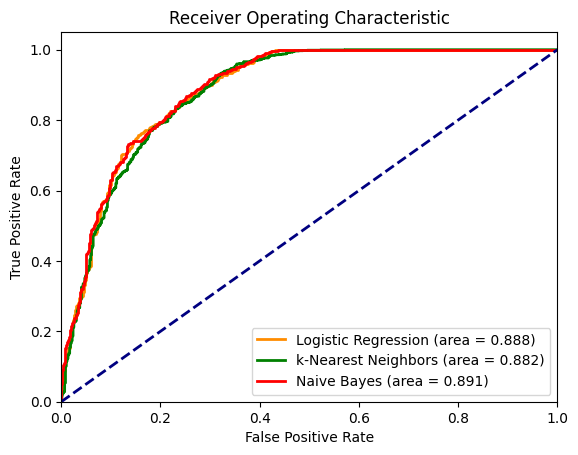

In [137]:
y_prob_log = log_best.predict_proba(X_test_transformed)[:, 1]
y_prob_knn = knn_best.predict_proba(X_test_transformed)[:, 1]
y_prob_nb = nb_best.predict_proba(X_test_transformed)[:, 1]

fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
roc_auc_log = auc(fpr_log, tpr_log)

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

fpr_nb, tpr_nb, _ = roc_curve(y_test, y_prob_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)


plt.figure()
plt.plot(fpr_log, tpr_log, color='darkorange', lw=2, label='Logistic Regression (area = %0.3f)' % roc_auc_log)
plt.plot(fpr_knn, tpr_knn, color='green', lw=2, label='k-Nearest Neighbors (area = %0.3f)' % roc_auc_knn)
plt.plot(fpr_nb, tpr_nb, color='red', lw=2, label='Naive Bayes (area = %0.3f)' % roc_auc_nb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In this graph, the orange line represents the logistic regression model, the green line represents the kNN model and red line represents the Naive Bayes model. The area under the curve (AUC) gives an overall measure of model performance. A perfect model has an AUC close to 1, so the better the model performs, the larger the area under the curve.

As can be seen from the figure, the AUC (0.891) of the Naive Byes is slightly higher than the AUC (0.889) of the kLogistic Regression and the AUC (0.882) of KNN model, which means that on this dataset, the performance of the Naive Bayes model is slightly better than that of the other 2 models.

In [138]:
# Get feature importances from Naive Bayes model
feature_importances = nb_best.theta_

# Create a dictionary with feature names and their importances
feature_importance_dict = {feature_name: importance for feature_name, importance in zip(X_train_transformed.columns, feature_importances[1])}

# Sort the dictionary by absolute importance in descending order
sorted_feature_importance = dict(sorted(feature_importance_dict.items(), key=lambda item: abs(item[1]), reverse=True))

# Print the sorted feature importances along with their names
for feature_name, importance in sorted_feature_importance.items():
    print(f"{feature_name}:     {importance}")

Location_Canada:     0.6900375603648721
Location_Australia:     0.5025934537649794
avg_spend:     0.49740654623502056
Location_Great Britain:     0.3099624396351279
Device_iOS:     -0.12663558116436574
Location_US:     -0.10437185325333519
Device_Android:     0.056335287245311096
Age:     0.0
avg_items:     0.0


---------------------------------------------X----------END-----OF-----CODING----------X-------------------------------------------------------

##### The main question you need to answer is: which factors can help us predict if a customer will churn?
- Based on the EDA and Correlation Analysis - The most important features which help in predicting whether a customer will churn or not are 1. Location, 2. Device, 3.Age, 4. Average Monthly Spend & 5.Average number of items bought in a month 

## Explain your model to a business executive. Your explanation should include the following:

### Your data exploration findings, initial hypothesis, and whether the hypothesis proved true.
- After cleaning the data, our initial hypothesis was that all the features are important. This was based on EDA and Correlation Analysis. However, after the analysis , we had to drop the feature - Average Calls. Therefore, our refined Hypothesis is : **'Age', 'Location', 'Device', 'avg_spend', 'avg_items' are important variables**



### Your approach for building and evaluating the model.
- We already discarded the SVM model since the dataset did not have clear bundaries. We considered Gaussain NB, KNN and Logistic Regression as our models. Then the following steps were followed:

A.	Data Preprocessing

1.	Defining Categorical and Numerical Columns: In this step, we establish the categorical and numerical columns that form the basis of our data analysis.
2.	Creating Target Variable: We designate the target variable, 'Churn', which serves as the focal point of our prediction task.
3.	Applying Categorical Transformation (One-Hot Encoding): We execute a one-hot encoding transformation on categorical features to convert them into binary vectors.
4.	Implementing Numerical Transformation (Standard Scaling): We apply Standard scaling to numerical features, ensuring they are standardized for consistent analysis.
5.	Constructing Final Preprocessor: We construct a comprehensive preprocessor using a ColumnTransformer that encapsulates both categorical and numerical transformations. This prepares the data for subsequent stages of modelling.


B.	Data Splitting

1.	Train-Test Data Split: To ensure unbiased model evaluation, we divide our dataset into training and testing subsets using the train_test_split function. This allows us to assess our model's performance on unseen data. We allocate 80% of the data for training (X_train, y_train) and the remaining 20% for testing (X_test, y_test), with a fixed random seed (random_state=42) for reproducibility.
2.	Data Transformation: To transform our feature data, we use the preprocessor defined earlier. Instead of fitting the preprocessor to each subset (x_train_transformed, x_test_transformed), we fit it to the entire dataset (df[cat_columns + num_columns]). This ensures consistent encoding and scaling across both subsets.
3.	Encoding Categorical Features: We use the preprocessor's fitted transformation to encode categorical columns in the training and testing subsets. The encoded categorical columns are captured in encoded_columns.
4.	Creating Feature Names: To retain interpretability, we merge encoded categorical columns with numerical columns to create a comprehensive list of features (all_feat).
5.	Final Transformation: We apply the preprocessor transformation to the training and testing subsets separately, resulting in transformed DataFrames X_train_transformed and X_test_transformed. These transformed features are ready for model training and testing.

By splitting our data, transforming features, and ensuring consistency in encoding and scaling, we set the stage for effective model development and evaluation.

C.	Hyperparameter Tuning 

1.	Selecting Hyperparameters: We define parameter options for each model. For Gaussian Naive Bayes, we explore a range of var_smoothing values using a logarithmic scale. For K-Nearest Neighbors (KNN), we experiment with different numbers of neighbors (n_neighbors) and two weight options: 'uniform' and 'distance'. A dictionary of hyperparameter options (params_log) is defined for logistic regression. These values encompass several aspects of the logistic regression model, including regularization type (penalty), regularization strength (C), intercept fitting (fit_intercept), optimization algorithm (solver), and elastic net mixing parameter (l1_ratio).
2.	Defining Model Instances: We establish instances of the models to be tuned: Gaussian Naive Bayes (nb), K-Nearest Neighbors (knn) and logistic Regresseion(log_reg)
3.	Configuring GridSearchCV: We set up GridSearchCV for Gaussian Naive Bayes. This technique exhaustively searches through parameter combinations using 5-fold cross-validation. We employ the 'roc_auc' scoring metric to assess model performance.
4.	Utilizing RandomizedSearchCV for KNN: Considering the substantial number of parameters for KNN, we opt for RandomizedSearchCV. This method performs a randomized search through the parameter space using 10-fold cross-validation.
5.  Utilizing RandomizedSearchCV: To facilitate this exploration, we employ RandomizedSearchCV. In this case, we perform 10-fold cross-validation and iterate through 15 combinations of hyperparameters. The scoring metric chosen is the F1 score, which strikes a balance between precision and recall, making it suitable for imbalanced classification tasks.
6.	Fitting the Models: We train the models using the training data transformed earlier: X_train_transformed and y_train. 
7.	Extracting Best Parameters: The best parameters identified through hyperparameter tuning all three models. 

D.	Training and Cross-validation 

1.	Applying Best Parameters: We utilize the best parameters obtained from the hyperparameter tuning process to instantiate optimized models: Gaussian Naive Bayes (nb_best), K-Nearest Neighbors (knn_best) and Logistic_regression(log_best)
2.	Conducting Cross-Validation: We perform cross-validation to comprehensively assess the models' performance. The cross_val_score function evaluates the models using 5-fold cross-validation, employing the 'roc_auc' scoring metric.
3.	Output of Cross-Validation:  Naive Bayes model had the highest Average CV Score
 Average Cross-validation scores for Naive Bayes:  0.878685978
 Average Cross-validation scores for KNN:  0.87174251
 Average Cross-validation scores for Logistic Regression:  0.876770694


E.	Evaluation Metrics - 

1. The Models were evaluated on various metric like Average Cross-validatopn Score, Accuracy Score, Precsion,recall, F1 Score and AUC-ROC


## The final model you selected and how you know this is the best model for the problem.
- The final Model Selected was Naive Bayes. It had the best values for :

- Average Cross-validatopn Score = 0.878685978,
- Accuracy Score = 0.87, 
- recall = 0.9957416607523066
- F1 Score = 0.9151989562948468
- AUC-ROC = 0.891

- Although, all the three models perfromed well if evaluated separately, The Naive Bayes Model outperformed each one of them. So this is the best model for our problem.



## How the model should be used by the business, in business process.
- The most significant coefficients for the Naive Bayes Model Location_Canada,Location_Australia,avg_spend,Location_Great Britain,Device_iOS and Location_US. By focusing on these feature variables, the Business can improve their ability of predictive wheather a customer will churn or not.

- Regularly monitoring and analyzing even monthly spend can help identify patterns which lead to churn of customers.Therefore, the business should also make sure that the data for these variables are collected properly to get the most out of this Model since these variables will help to predict whether the customer will churn or not, giving the business the opportunity to take preventive action.

